# Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

#this adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

# Reading the excel file and initial exploration**

In [2]:
df=pd.read_csv("Our Bank customer data For Python.csv")

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [4]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
dtype: object

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


# Delete column Unnamed: 21  as it is not needed for analysis

In [10]:
df.drop(columns='Unnamed: 21', inplace=True)

# Find duplicate customers if any

In [14]:
df_duplicated=df[df.duplicated(subset='CLIENTNUM',keep=False)]

**No duplicate customers found**

In [15]:
df_duplicated

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


# Check for NULLs

In [19]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**There are no Nulls present in the data set**

# Check info of the dataframe to the get idea of datatypes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Checking unique values of ['Attrition_Flag']

In [21]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

# Add new column ['Churned']  having values 1 for Attrited Customer 0 for Existing Customer

In [29]:
for i in df.index:
    if(df['Attrition_Flag'][i]=='Existing Customer'):
        df['Churned'][i]=0
    else:
        df['Churned'][i]=1


<ipython-input-29-7c6de561bad3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'][i]=0
<ipython-input-29-7c6de561bad3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'][i]=1


In [31]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,1


# To find correlation 


In [39]:
df.Churned = df.Churned.astype(int)
df.Churned

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Churned, Length: 10127, dtype: int32

<AxesSubplot:>

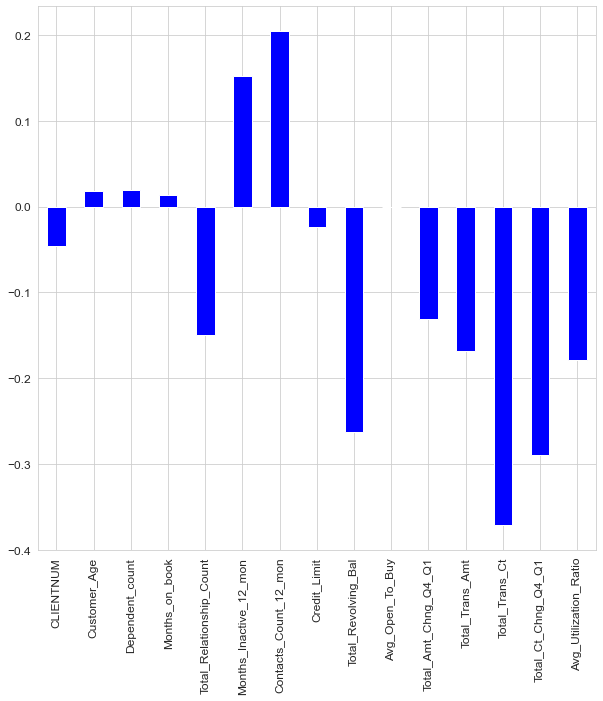

In [40]:
correlations = df.loc[ : , df.columns != 'Churned'].corrwith(df.Churned)  # This will ensure CHurned column relation with every other column except Churned
correlations = correlations[correlations!=1]  # to filter the same column co-relations
correlations.plot.bar(figsize = (10, 10),fontsize = 12,color = 'b',grid = True)



In [44]:
correlations

CLIENTNUM                  -0.046430
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
dtype: float64

# Logistic regression

In [67]:
# As column CLIENTNUM is just the unique identifier , this is not needed for our analysis. Hence slicing the dataframe


df2 = df.iloc[:,1:]

In [68]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


In [69]:
# To deal with remaining categorical variables. A Dummy Variable is a way of incorporating nominal variables into a regression as a binary value. 

dummy_df = pd.get_dummies(df2)

In [70]:
dummy_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,1,0,0,0,0,1,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,1,0,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,1,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,1,0,0,0,0,1,0,0,0


In [72]:
dummy_df['Gender_F']

0        0
1        1
2        0
3        1
4        0
        ..
10122    0
10123    0
10124    1
10125    0
10126    1
Name: Gender_F, Length: 10127, dtype: uint8

In [74]:
# Establish target feature, churn
y = dummy_df.Churned.values

In [76]:
# Drop the target feature from remaining features
X = dummy_df.drop('Churned', axis = 1)

In [77]:
# Save dataframe column titles to list, we will need them in next step

cols = X.columns

In [79]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler

In [80]:
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()

In [81]:
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [82]:
from sklearn.model_selection import train_test_split



In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [84]:
#Building the Model
from sklearn.linear_model import LogisticRegression

In [85]:
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept

logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver= 'liblinear')

In [86]:
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [87]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [88]:
#Evaluating Model Performance
#we will take the residual distance between actual training data and predicted training data,
#as well as actual test data and predicted test data.

In [89]:
# Find residual differences between train data and predicted train data
resiudals = np.abs(y_train, y_hat_train)

In [92]:
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(resiudals).value_counts())

0    6371
1    1224
dtype: int64


In [95]:
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(resiudals).value_counts(normalize = True))

0    0.838841
1    0.161159
dtype: float64


In [96]:
# Print the number of times our model was correct ('0') and incorrect ('1') for test data

print(pd.Series(y_test).value_counts())

0    2129
1     403
dtype: int64


In [98]:
# Print normalized amount of times our model was correct (percentage) for test data

print(pd.Series(y_hat_test).value_counts(normalize=True))

0    0.840837
1    0.159163
dtype: float64


In [99]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [100]:
cnf_matrix

array([[2129,    0],
       [   0,  403]], dtype=int64)

<AxesSubplot:>

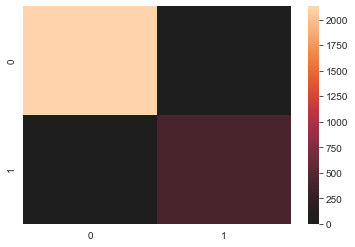

In [177]:
# drawing confusion matrix
sns.heatmap(cnf_matrix, center = True)  #,cmap='GnBu'
#plt.show()

In [169]:
cm = confusion_matrix(y_test, y_hat_test)

[[2129    0]
 [   0  403]]
1.0 %


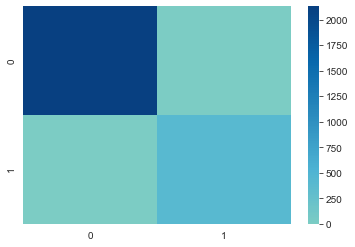

In [103]:
# Logistic regression

# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')
# drawing confusion matrix
sns.heatmap(cm, center = True,cmap='GnBu')
plt.show()

# Exploratory Analysis

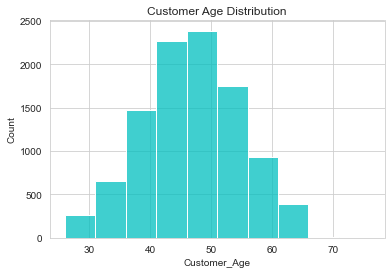

In [131]:
# Customer Age Histogram --- Highest number in age group - 45-50 ,50-55
sns.histplot(data=df.Customer_Age,binwidth=5,color='c').set_title("Customer Age Distribution");

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

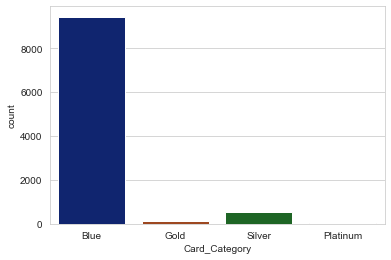

In [137]:
# Card Types -- Highest - Blue Cards
sns.countplot(x=df.Card_Category,palette ='dark')

<AxesSubplot:xlabel='Gender', ylabel='count'>

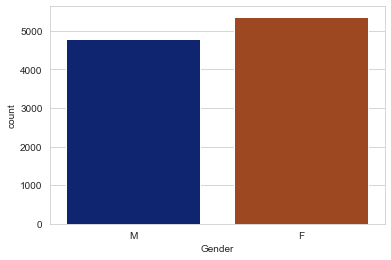

In [138]:
# Gender -- Highest - Female

sns.countplot(x=df.Gender,palette ='dark')

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

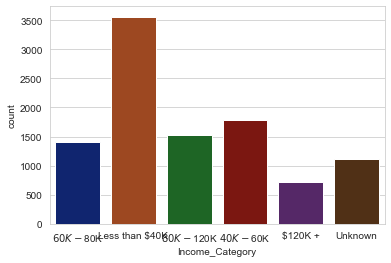

In [145]:
# Income  -Less than 40 K highest
sns.countplot(x=df.Income_Category,palette ='dark',orient='v')

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

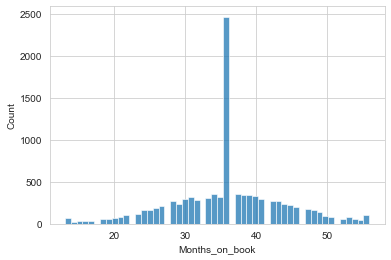

In [151]:
sns.histplot(data=df.Months_on_book)

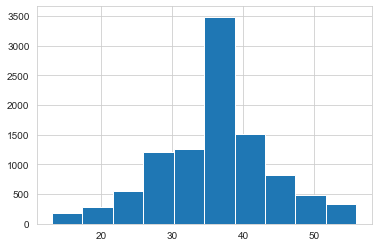

In [153]:
#Period of relationship with bank   
plt.hist(x=df.Months_on_book);

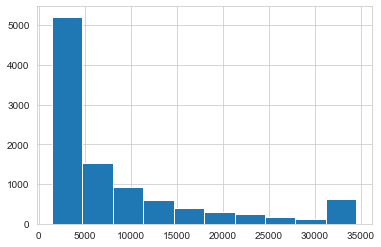

In [155]:
#Credit Limit

plt.hist(x=df.Credit_Limit);

<AxesSubplot:ylabel='Attrition_Flag'>

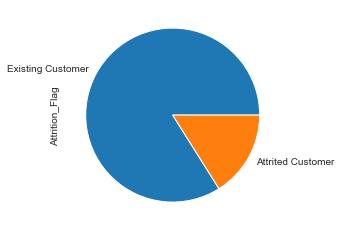

In [166]:
# Pie to find No of attrited customers
df['Attrition_Flag'].value_counts().plot.pie()

In [167]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Churned                       int32
dtype: object

# Save the dataframe as CSV

In [179]:
df.to_csv("Our Bank customer data Cleaned.csv", sep=',',index=False)